
<h1 style="background-color: Coral; color: FloralWhite; padding:35px; border-radius: 8px; text-align: center; font-family: 'Times New Roman', serif;">
Proiect 6 - Clasificare
</h1>


<h2 style="background-color: Coral; color: FloralWhite; padding: 17.5px; border-radius: 4px; text-align: Left; font-family: 'Times New Roman', serif;">
Explorarea inițială a datelor  </h2>


In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Încărcarea setului de date 
try:
    df = pd.read_csv('fake_job_postings.csv')
except FileNotFoundError:
    print("Eroare: Fișierul 'fake_job_postings.csv' nu a fost găsit.")
    exit()

In [190]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<h4 style="background-color: Coral; color: FloralWhite; padding: 8.75px; border-radius: 2px; text-align: Left; font-family: 'Times New Roman', serif;">
Setul este conceput pentru detectarea anunțurilor de job false (scam). Scopul principal este construirea unui model de clasificare care, pe baza informațiilor textuale și a metadatelor unui anunț de angajare, poate determina dacă acel job este real (0) sau fraudulos (1).
</h4>

<h4 style="background-color: Coral; color: FloralWhite; padding: 14px; border-radius: 4px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b> Descrierea Coloanelor:</b>
</h4>

1. **job_id** – Identificator unic al anunțului de job.

2. **title** – Titlul postului (ex.: “Software Engineer”, “Sales Manager”).

3. **location** – Locația jobului (țară, oraș etc.).

4. **department** – Departamentul companiei (ex.: “Marketing”, “Engineering”).

5. **salary_range** – Intervalul salarial oferit (dacă este specificat).

6. **company_profile** – Descrierea companiei (scurt text liber).

7. **description** – Descriere detaliată a rolului, responsabilități, activități.

8. **requirements** – Cerinţe pentru candidat: studii, experiență, abilități.

9. **benefits** – Beneficii oferite de companie.

10. **telecommuting** – Indicator binar (0/1) care arată dacă jobul permite lucru remote.

11. **has_company_logo** – Indicator (0/1) privind prezența unui logo al companiei.

12. **has_questions** – Indicator (0/1) dacă anunțul include întrebări de preselecție.

13. **employment_type** – Tipul angajării: Full-time, Part-time, Contract etc.

14. **required_experience** – Nivelul de experiență solicitat (Entry Level, Senior etc.).

15. **required_education** – Nivelul educațional cerut (Bachelor, Master etc.).

16. **industry** – Industria în care activează compania (IT, Health, Real Estate etc.).

17. **function** – Funcția rolului (Sales, Engineering, Management etc.).

18. **fraudulent** – Variabila-țintă (0 = job real, 1 = job fals / scam)

In [191]:
df.shape

(17880, 18)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [193]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [194]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<h4 style="background-color: Coral; color: FloralWhite; padding: 8.75px; border-radius: 2px; text-align: Left; font-family: 'Times New Roman', serif;">
Eliminam valorile nule, din setul nostru de date  </h4>


In [195]:
df = df.dropna()

In [196]:
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [197]:
df.duplicated().sum()

0

In [198]:
df.nunique()

job_id                 774
title                  615
location               217
department             243
salary_range           300
company_profile        198
description            693
requirements           641
benefits               526
telecommuting            2
has_company_logo         2
has_questions            2
employment_type          5
required_experience      7
required_education      10
industry                68
function                36
fraudulent               2
dtype: int64

In [199]:
categorial_drops = ['job_id','title','location','department','salary_range',
                             'company_profile','description','requirements','benefits','industry']


df = df.drop(categorial_drops,axis=1)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 6 to 17865
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        774 non-null    int64 
 1   has_company_logo     774 non-null    int64 
 2   has_questions        774 non-null    int64 
 3   employment_type      774 non-null    object
 4   required_experience  774 non-null    object
 5   required_education   774 non-null    object
 6   function             774 non-null    object
 7   fraudulent           774 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 54.4+ KB


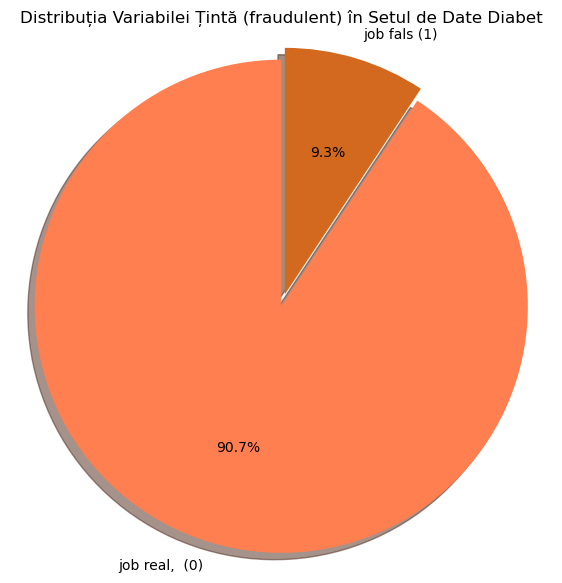

Distribuția exactă a claselor:
fraudulent
0    702
1     72
Name: count, dtype: int64
Total înregistrări: 774


In [201]:
outcome_counts = df['fraudulent'].value_counts()

labels = ['job real,  (0)', 'job fals (1)']
sizes = outcome_counts.values
colors = ['#FF7F50', '#D2691E'] 
explode = (0.05, 0) 

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribuția Variabilei Țintă (fraudulent) în Setul de Date Diabet')
plt.axis('equal') 
plt.show()


print("Distribuția exactă a claselor:")
print(outcome_counts)
print(f"Total înregistrări: {df.shape[0]}")


In [202]:
from sklearn.preprocessing import LabelEncoder
df=df
le = LabelEncoder()
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['function'] = le.fit_transform(df['function'])

df.head()


,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent
6,0,1,1,1,5,4,20,0
15,0,1,1,1,3,1,31,0
23,0,1,0,1,3,7,31,0
98,0,1,1,1,5,3,23,1
102,1,1,0,1,2,1,22,0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 6 to 17865
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   telecommuting        774 non-null    int64
 1   has_company_logo     774 non-null    int64
 2   has_questions        774 non-null    int64
 3   employment_type      774 non-null    int32
 4   required_experience  774 non-null    int32
 5   required_education   774 non-null    int32
 6   function             774 non-null    int32
 7   fraudulent           774 non-null    int64
dtypes: int32(4), int64(4)
memory usage: 42.3 KB


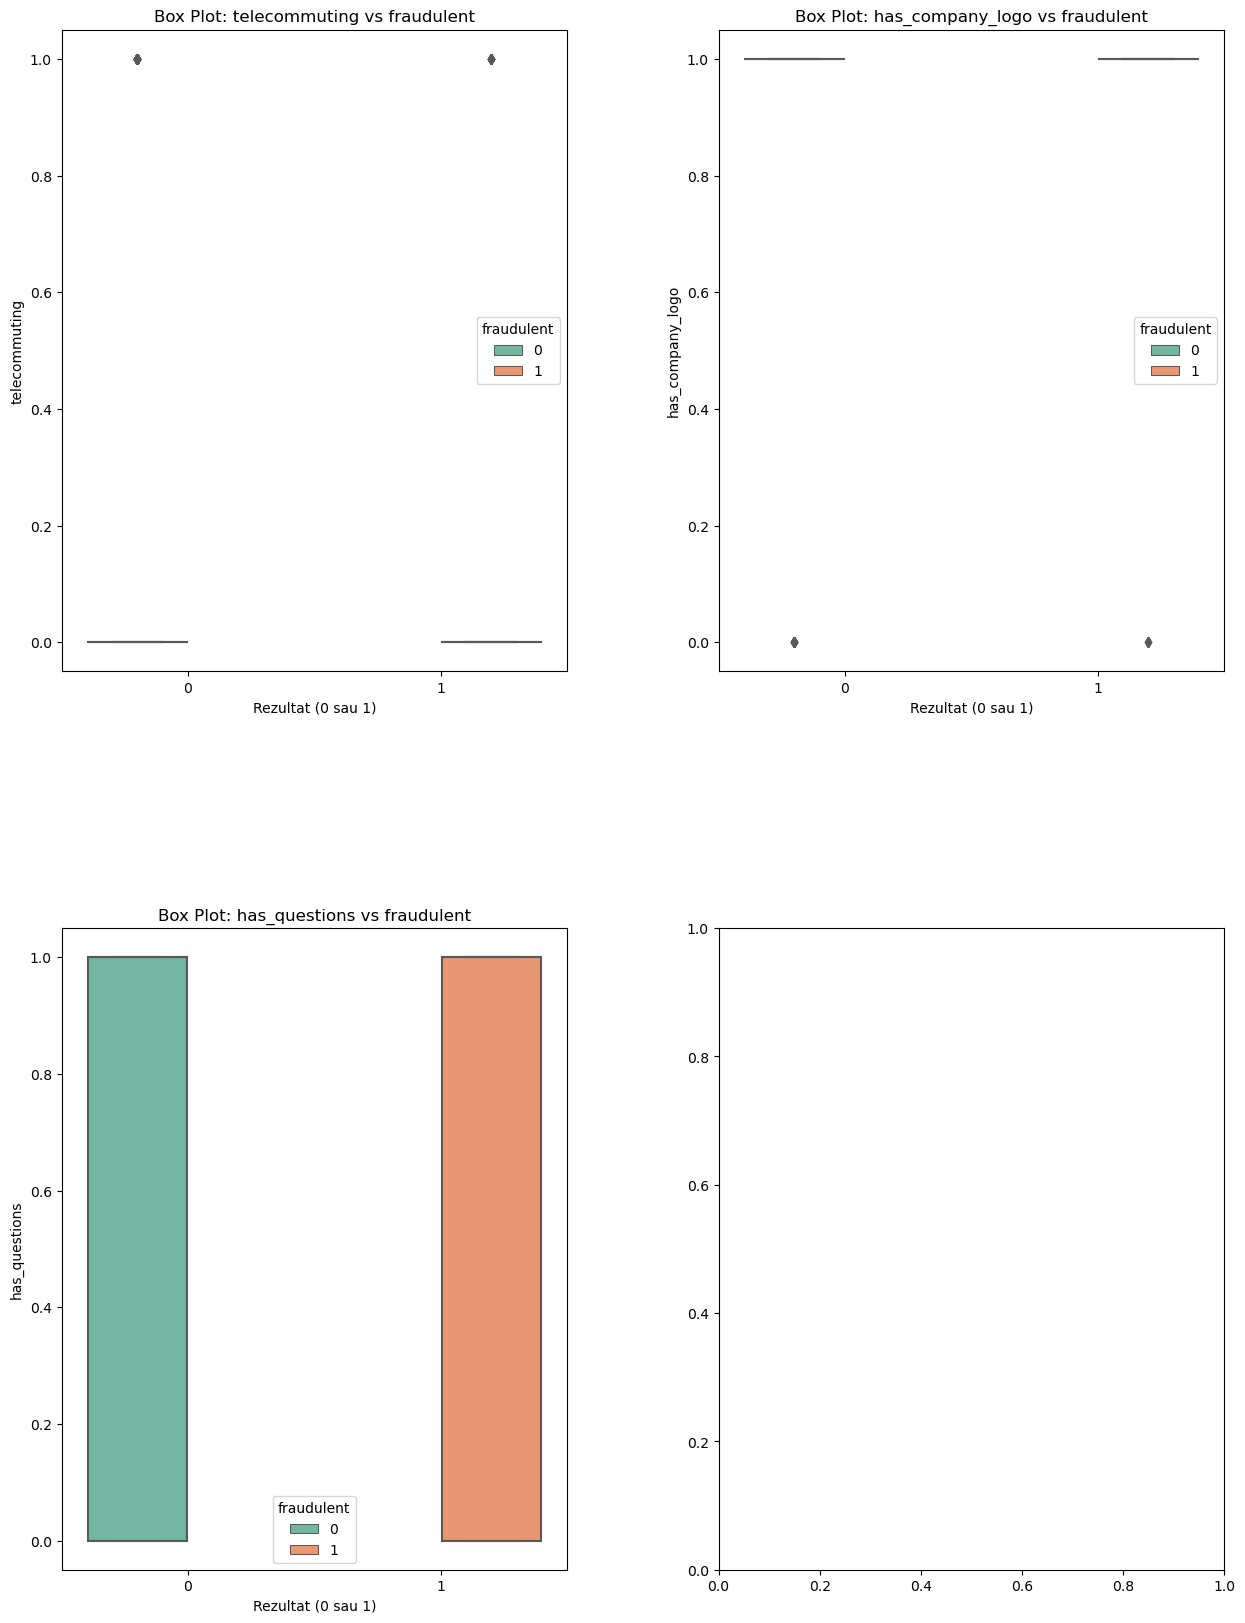

In [204]:
features = ['telecommuting', 'has_company_logo','has_questions']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # ajustează spațierea între grafice

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(x='fraudulent', y=feature, data=df, ax=ax, palette='Set2', hue='fraudulent')
    
    ax.set_title(f'Box Plot: {feature} vs fraudulent')
    ax.set_xlabel('Rezultat (0 sau 1)')
    ax.set_ylabel(feature)


plt.show()



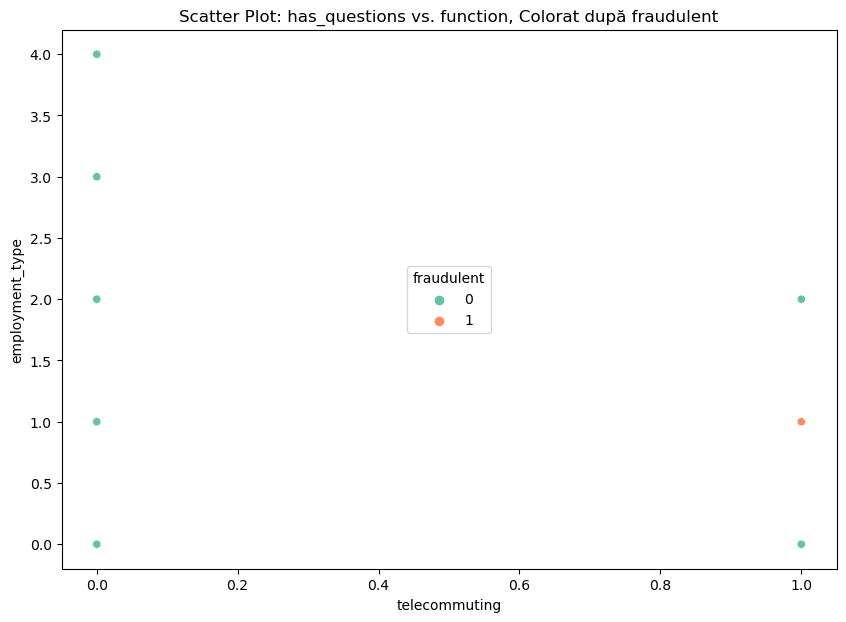

In [205]:
plt.figure(figsize=(10, 7))

sns.scatterplot(data=df, x='telecommuting', y='employment_type', hue='fraudulent', palette='Set2')
plt.title('Scatter Plot: has_questions vs. function, Colorat după fraudulent')
plt.xlabel('telecommuting')
plt.ylabel('employment_type')
plt.legend(title='fraudulent', loc='center', bbox_to_anchor=(0.5, 0.5))
plt.show()


<h4 style="background-color: Coral; color: FloralWhite; padding: 8.75px; border-radius: 2px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b>Observtie</b>:<br>
    Setul de date confirma cum companiile care arată permit lucru remot sugereaza ca job-ul este real  
    </h4>


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


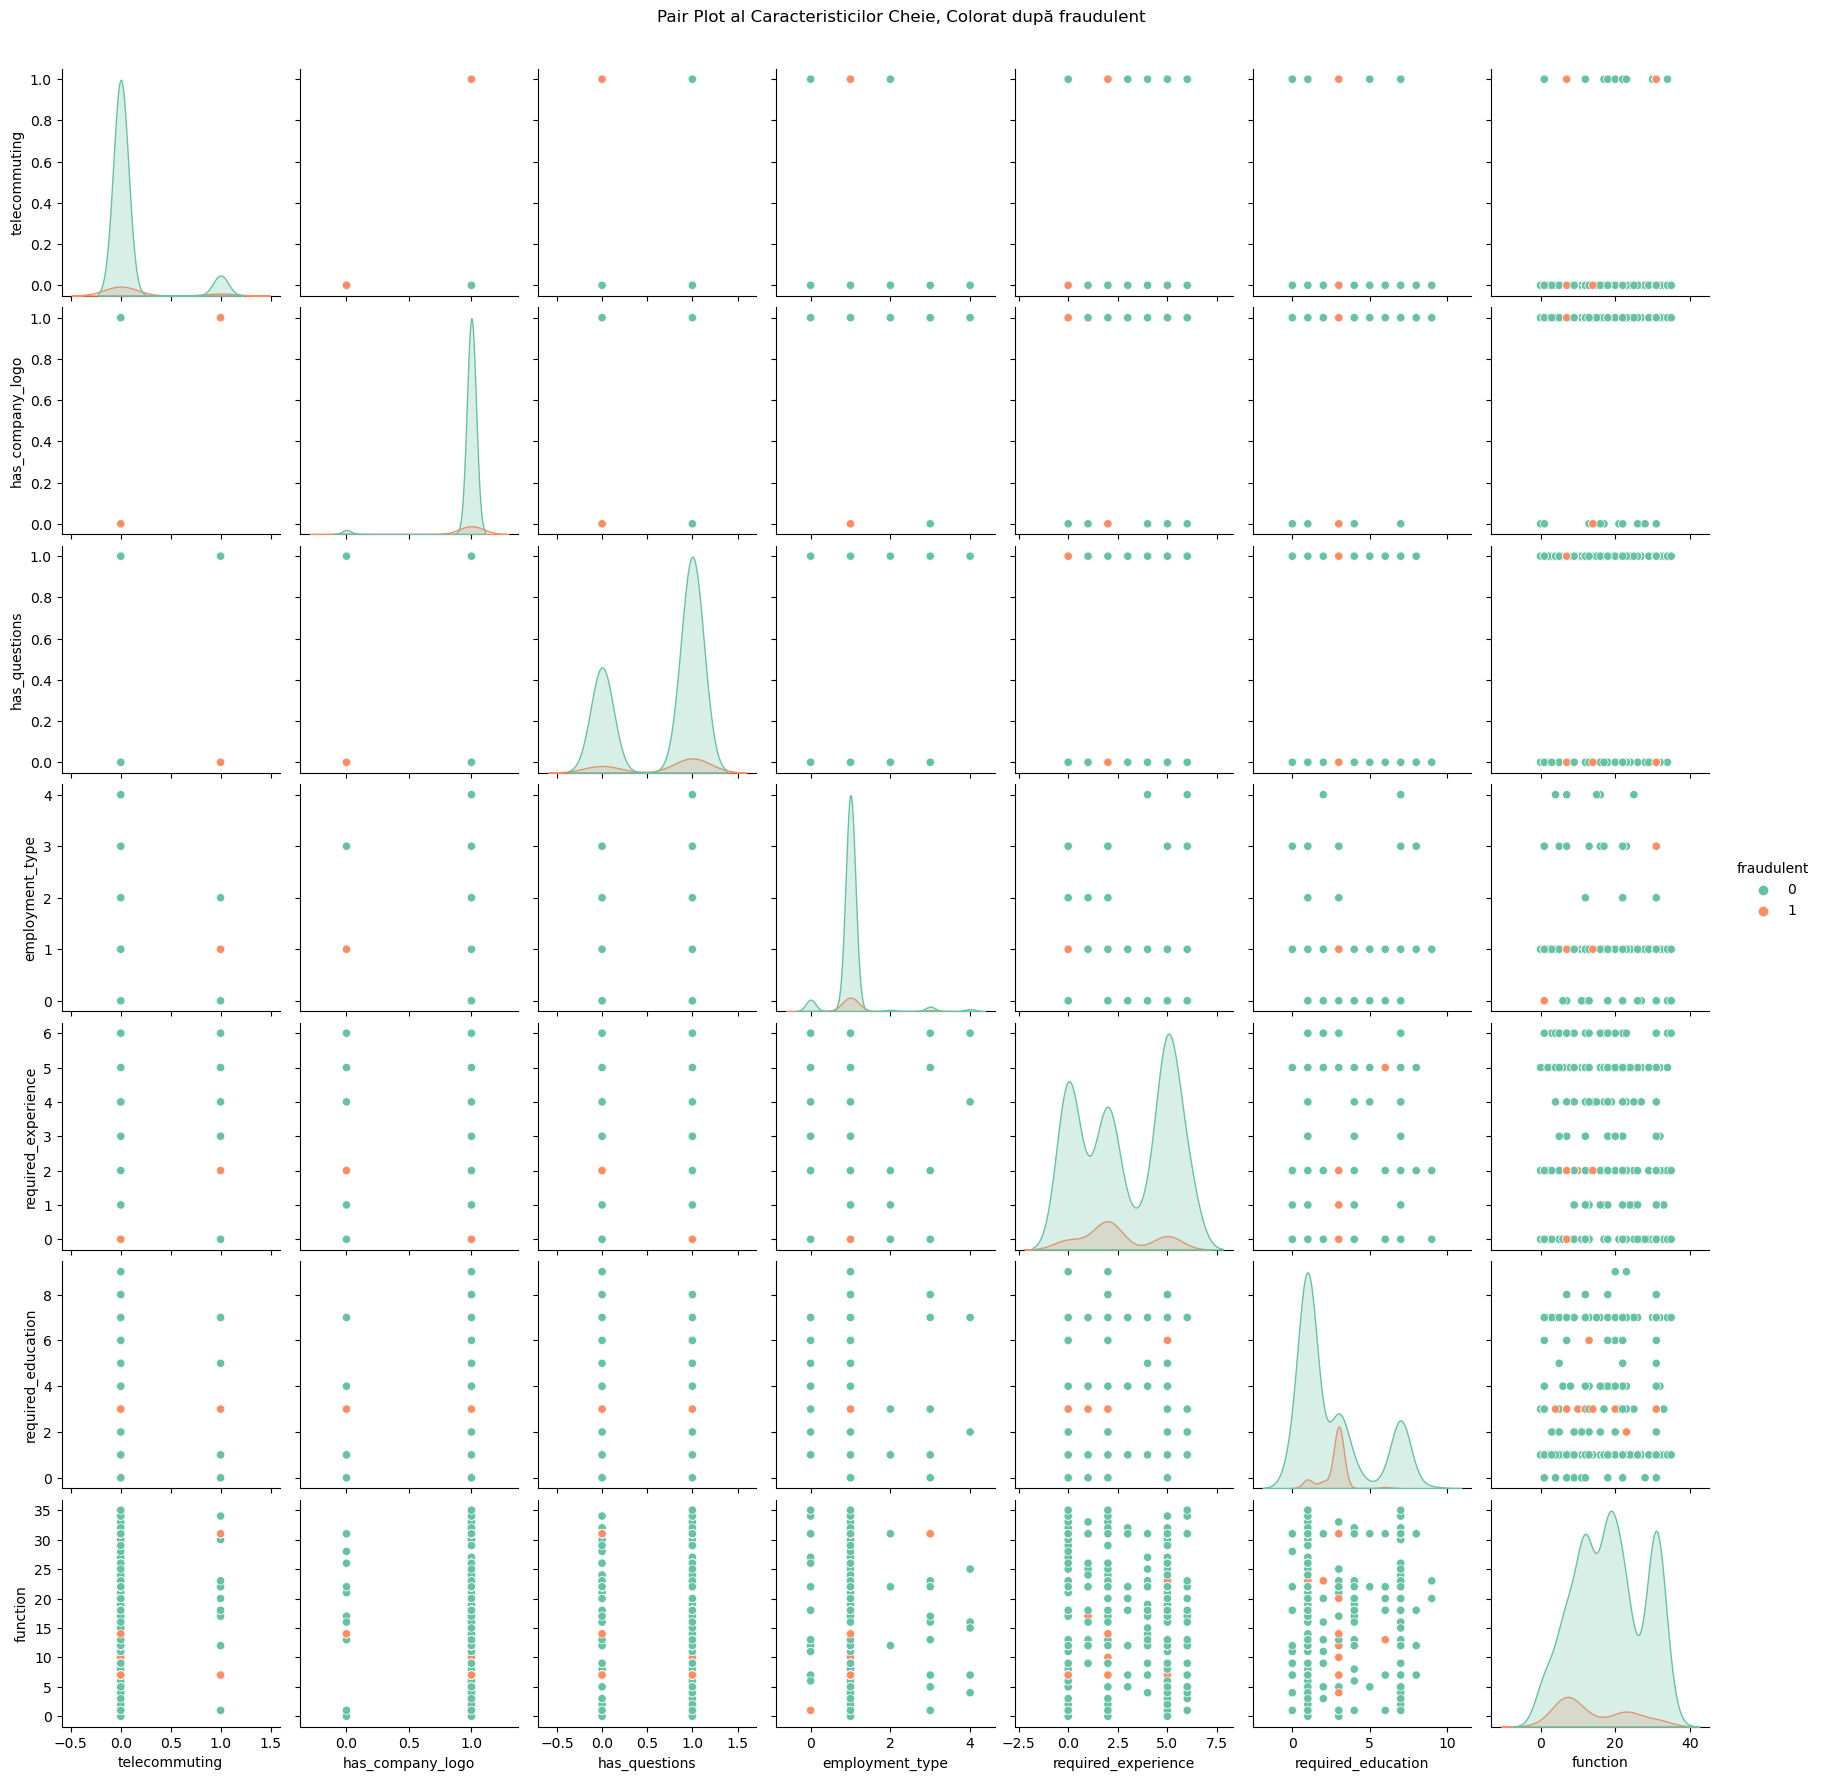

In [152]:
sns.pairplot(df, hue='fraudulent', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot al Caracteristicilor Cheie, Colorat după fraudulent', y=1.02)
plt.show()


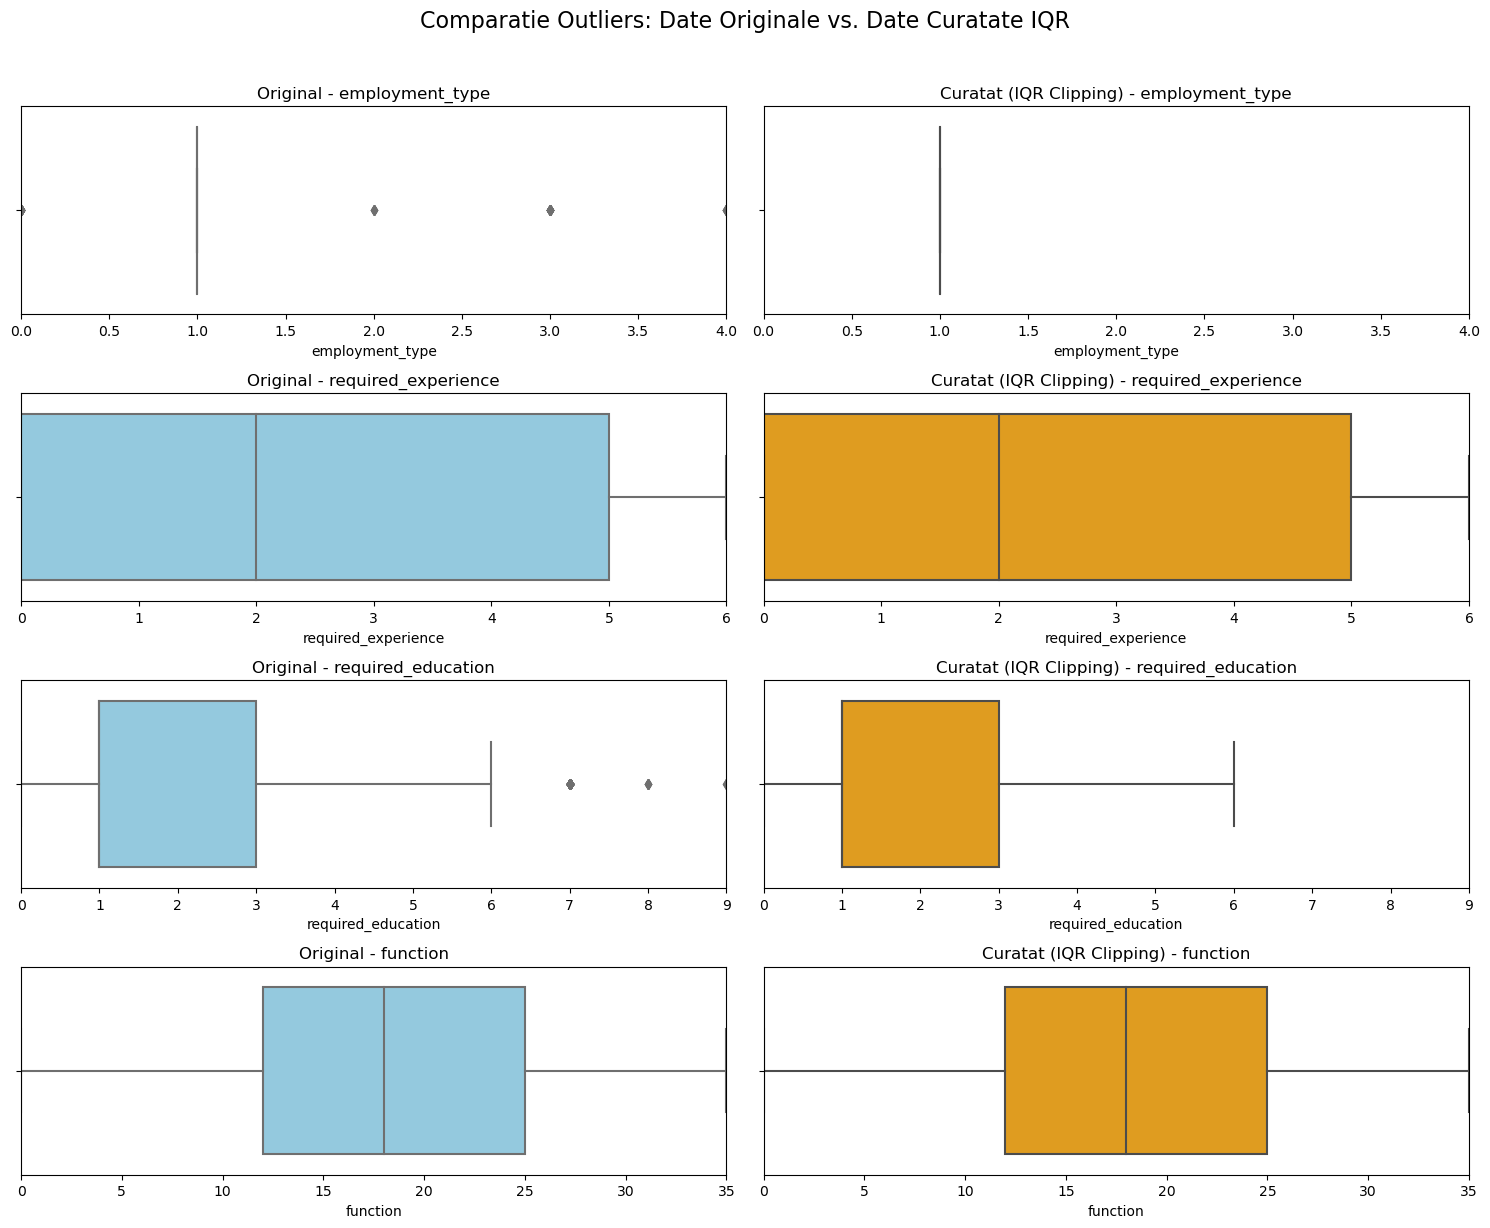

In [208]:
df_original=df.copy()
df_cleaned = df.copy()
cols_to_clip = ['employment_type','required_experience'
                 ,'required_education','function']

for col in cols_to_clip:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)


fig, axes = plt.subplots(len(cols_to_clip), 2, figsize=(15, 12))
plt.suptitle('Comparatie Outliers: Date Originale vs. Date Curatate IQR', y=1.02, fontsize=16)

for i, col in enumerate(cols_to_clip):
    sns.boxplot(x=df_original[col], ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original - {col}')
    axes[i, 0].set_xlim(df_original[col].min(), df_original[col].max()) 
    
    sns.boxplot(x=df_cleaned[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Curatat (IQR Clipping) - {col}')
    axes[i, 1].set_xlim(df_original[col].min(), df_original[col].max()) #

plt.tight_layout()
plt.show()


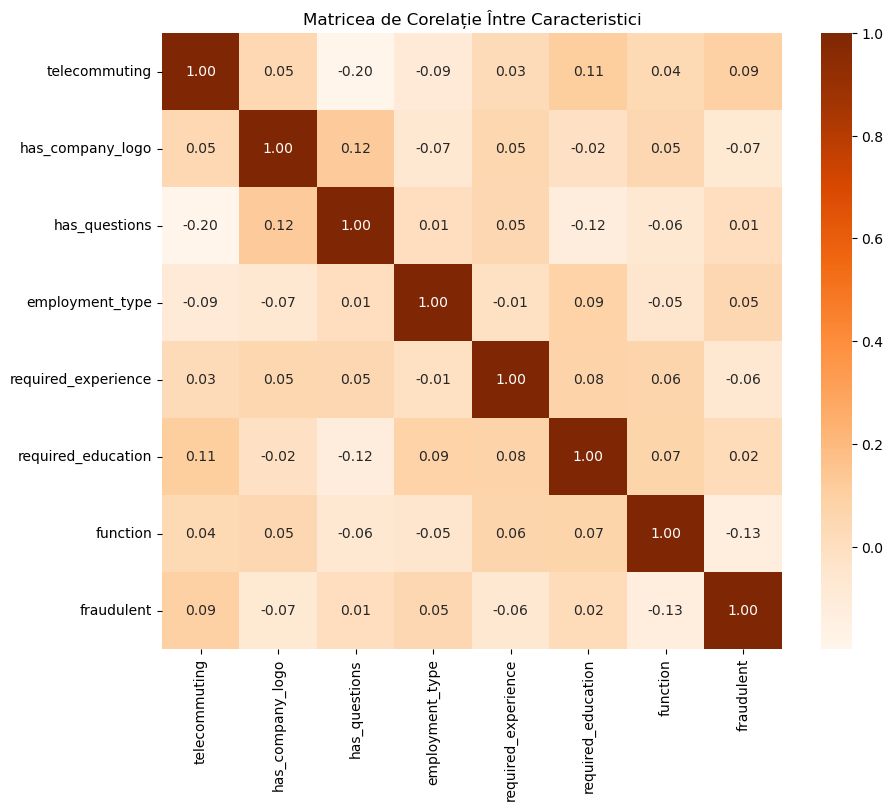

In [224]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Oranges', fmt='.2f')
plt.title('Matricea de Corelație Între Caracteristici') 
plt.show() 

<h3 style="background-color: Coral; color: FloralWhite; padding: 12.75px; border-radius: 3px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b> Observatii: </b> <br>
    Nu identificam cazuri de multi-coliniaritate.
</h3>


In [210]:
# Împărțirea Setului de Date (Train, Test) și Scalare

X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

# Împărțire 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificăm dimensiunile dataset-urilor
print("Dimensiune X_train:", X_train.shape)
print("Dimensiune X_test:", X_test.shape)
print("Dimensiune y_train:", y_train.shape)
print("Dimensiune y_test:", y_test.shape)


Dimensiune X_train: (541, 7)
Dimensiune X_test: (233, 7)
Dimensiune y_train: (541,)
Dimensiune y_test: (233,)


In [211]:
# Scalare
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


print("X_train_scaled_df:")
display(X_train_scaled_df.head())

print("X_test_scaled_df:")
display(X_test_scaled_df.head())

X_train_scaled_df:


,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function
1974,-0.30845,0.144065,0.671120,-0.054111,0.985728,-0.699333,0.417581
7088,-0.30845,0.144065,0.671120,-0.054111,0.985728,0.195086,-0.658699
8850,-0.30845,0.144065,0.671120,-0.054111,-1.289352,-0.699333,-0.658699
15066,-0.30845,0.144065,-1.490046,-0.054111,-1.289352,-0.699333,0.417581
1956,-0.30845,0.144065,-1.490046,-0.054111,-0.379320,0.195086,0.525209


X_test_scaled_df:


,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function
15853,-0.30845,0.144065,0.67112,-0.054111,0.985728,-0.699333,-0.658699
4744,-0.30845,0.144065,0.67112,-0.054111,-1.289352,-0.699333,1.386233
255,-0.30845,0.144065,0.67112,-0.054111,-1.289352,-0.699333,-0.551071
12168,-0.30845,0.144065,0.67112,-0.054111,-1.289352,-0.699333,-0.012931
5017,-0.30845,0.144065,0.67112,-0.054111,-1.289352,-0.699333,-1.196840


In [212]:
#  Antrenarea Modelului MLPClassifier  

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=2000,
    solver='adam',
    random_state=42,
    activation='relu'
)
mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42)

In [213]:
#  Evaluarea Modelului 
predictions_train = mlp.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, predictions_train)

print(f"Acuratețea modelului pe setul de antrenare: {accuracy_train*100:.2f}%")

predictions_test = mlp.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, predictions_test)

print(f"Acuratețea modelului pe setul de testare: {accuracy_test*100:.2f}%")


Acuratețea modelului pe setul de antrenare: 97.41%
Acuratețea modelului pe setul de testare: 94.42%


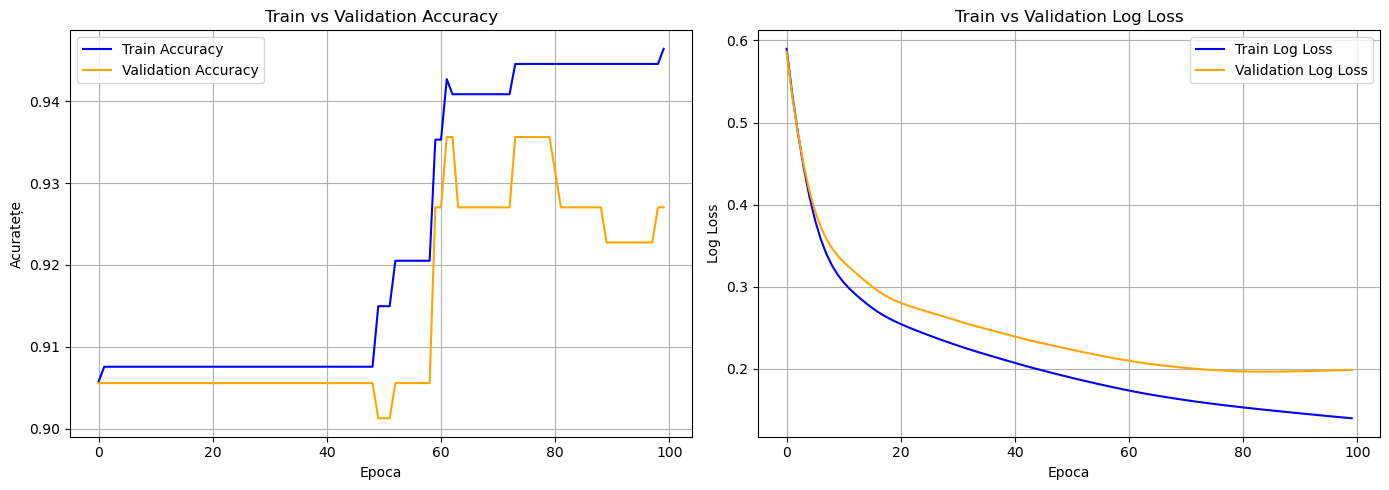

In [218]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import log_loss
# Ignorăm warning-urile ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Model MLP cu warm_start
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1,        
    warm_start=True,
    random_state=42
)


mlp.partial_fit(X_train_scaled, y_train, classes=np.array([0,1]))

epochs = 100
train_acc = []
val_acc   = []
train_loss = []
val_loss   = []

for ep in range(epochs):
    mlp.partial_fit(X_train_scaled, y_train)

    # Predicții și probabilități
    y_train_pred = mlp.predict(X_train_scaled)
    y_val_pred   = mlp.predict(X_test_scaled)
    y_train_prob = mlp.predict_proba(X_train_scaled)
    y_val_prob   = mlp.predict_proba(X_test_scaled)

    # Accuracy
    train_acc.append(accuracy_score(y_train, y_train_pred))
    val_acc.append(accuracy_score(y_test, y_val_pred))

    # Log-loss
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))


fig, axs = plt.subplots(1, 2, figsize=(14,5))

# Accuracy
axs[0].plot(train_acc, label='Train Accuracy', color='blue')
axs[0].plot(val_acc, label='Validation Accuracy', color='orange')
axs[0].set_title('Train vs Validation Accuracy')
axs[0].set_xlabel('Epoca')
axs[0].set_ylabel('Acuratețe')
axs[0].legend()
axs[0].grid(True)

# Log-loss
axs[1].plot(train_loss, label='Train Log Loss', color='blue')
axs[1].plot(val_loss, label='Validation Log Loss', color='orange')
axs[1].set_title('Train vs Validation Log Loss')
axs[1].set_xlabel('Epoca')
axs[1].set_ylabel('Log Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [220]:
print("\nRaport de Clasificar:")
print(classification_report(y_test, predictions_test))


Raport de Clasificar:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       211
           1       0.68      0.77      0.72        22

    accuracy                           0.94       233
   macro avg       0.83      0.87      0.85       233
weighted avg       0.95      0.94      0.95       233



<h3 style="background-color: Coral; color: FloralWhite; padding: 12.75px; border-radius: 3px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b> Observatii: </b> <br>
<ul>
  <li>Acuratețe globală: 94% din totalul cazurilor au fost clasificate corect.</li>
  <li>Detectarea joburi reale: Modelul este excelent, identificând corect 96% din cazurile reale (recall) și având o precizie de 99% atunci când prezice un job real.</li>
  <li>Detectarea job fraudulent: Aici performanța scade semnificativ din cauza dezechilibrului datelor. Modelul a identificat corect doar 77% din cazurile fraudulente, iar din toate predicțiile de reale, doar 68% au fost corecte (precizie). </li>
</ul>
</h3>


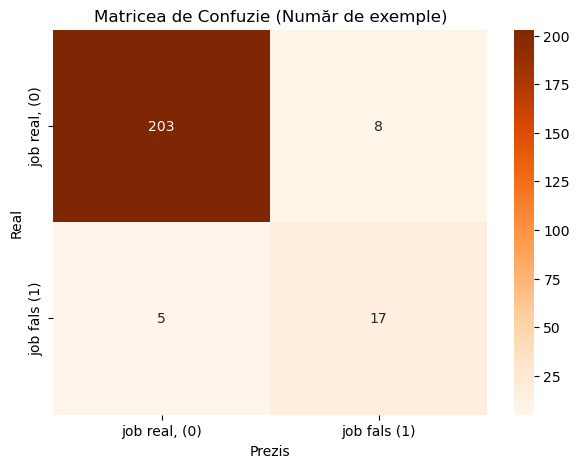

In [223]:
# Matricea de confuzie
cm = confusion_matrix(y_test, predictions_test)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['job real, (0)', 'job fals (1)'],
            yticklabels=['job real, (0)', 'job fals (1)'])
plt.xlabel('Prezis')
plt.ylabel('Real')
plt.title('Matricea de Confuzie (Număr de exemple)')
plt.show()

<h3 style="background-color: Coral; color: FloralWhite; padding: 12.75px; border-radius: 3px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b> Observatii: </b> <br>
    Modelul are o acuratețe generală bună (a prezis corect 203 + 17 = 220 din totalul de 233 de cazuri), dar performanța sa este dezechilibrată din cauza setului de date (211 de cazuri benigne reale doar 22 maligne).
</h3>


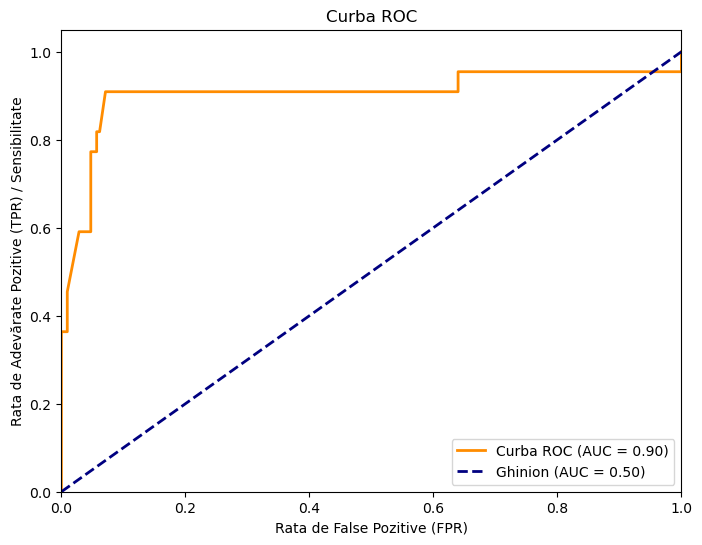

In [222]:

from sklearn.metrics import roc_curve, auc

y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curba ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Ghinion (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rata de False Pozitive (FPR)')
plt.ylabel('Rata de Adevărate Pozitive (TPR) / Sensibilitate')
plt.title('Curba ROC')
plt.legend(loc="lower right")
plt.show()


<h3 style="background-color: Coral; color: FloralWhite; padding: 12.75px; border-radius: 3px; text-align: Left; font-family: 'Times New Roman', serif;">
    <b> Observatii: </b> <br>
    O valoare <b>AU</b> de 0.90 pentru Curba ROC indică faptul că modelul are o putere buna de predicție, Faptul că modelul  este mult deasupra acestei linii confirmă că modelul este mult mai bun decât, indica o abilitate puternică de a identifica corect cazurile pozitive, minimizând în același timp cazurile fals pozitive.
</h3>
